##### Data source
Individual Income Tax Statistics: https://www.irs.gov/statistics/soi-tax-stats-individual-income-tax-statistics-zip-code-data-soi \
Data for New York, 2018. 

In [2]:
import pandas as pd

### IRS Charitable Contributions Data
Data for the year of 2018

In [3]:
df_charitable_donations_by_zip_codes = pd.read_excel("charitable_donation_zip_code.xlsx")
df_charitable_donations_by_zip_codes

,zip_code,size_of_adjusted_gross_income,number_of_returns_charitable_contribution
0,10001.0,NaN,2220.0
1,10001.0,1.0,60.0
2,10001.0,2.0,80.0
3,10001.0,3.0,140.0
4,10001.0,4.0,170.0
...,...,...,...
12274,99999.0,2.0,450.0
12275,99999.0,3.0,740.0
12276,99999.0,4.0,900.0
12277,99999.0,5.0,2570.0


In [4]:
#deleteing rows with NaN
df_charitable_donations_by_zip_codes.dropna(inplace = True)
df_charitable_donations_by_zip_codes

,zip_code,size_of_adjusted_gross_income,number_of_returns_charitable_contribution
1,10001.0,1.0,60.0
2,10001.0,2.0,80.0
3,10001.0,3.0,140.0
4,10001.0,4.0,170.0
5,10001.0,5.0,600.0
...,...,...,...
12274,99999.0,2.0,450.0
12275,99999.0,3.0,740.0
12276,99999.0,4.0,900.0
12277,99999.0,5.0,2570.0


In [5]:
#changing type from float to integer
df_charitable_donations_by_zip_codes["zip_code"] = df_charitable_donations_by_zip_codes["zip_code"].astype(int)
df_charitable_donations_by_zip_codes["number_of_returns_charitable_contribution"] = df_charitable_donations_by_zip_codes["number_of_returns_charitable_contribution"].astype(int)
df_charitable_donations_by_zip_codes["size_of_adjusted_gross_income"] = df_charitable_donations_by_zip_codes["size_of_adjusted_gross_income"].astype(int)

In [6]:
df_charitable_donations_by_zip_codes

,zip_code,size_of_adjusted_gross_income,number_of_returns_charitable_contribution
1,10001,1,60
2,10001,2,80
3,10001,3,140
4,10001,4,170
5,10001,5,600
...,...,...,...
12274,99999,2,450
12275,99999,3,740
12276,99999,4,900
12277,99999,5,2570


In [7]:
#filtering data for income 100,000 or more
#keeping income categories 5 (100k - bellow 200K) an 6 (200k or more)
df_charitable_donations_by_zip_codes = df_charitable_donations_by_zip_codes.loc[(df_charitable_donations_by_zip_codes['size_of_adjusted_gross_income'] == 5) | \
           (df_charitable_donations_by_zip_codes['size_of_adjusted_gross_income'] == 6)]

In [9]:
df_charitable_donations_by_zip_codes

,zip_code,size_of_adjusted_gross_income,number_of_returns_charitable_contribution
5,10001,5,600
6,10001,6,1170
13,10002,5,880
14,10002,6,910
21,10003,5,1670
...,...,...,...
12262,14904,6,0
12269,14905,5,90
12270,14905,6,80
12277,99999,5,2570


In [9]:
#Importing data of top 25 stations
df_postal_codes = pd.read_csv("top_25_w_zipcodes.csv")

In [10]:
df_postal_codes

,STATION_LINE,Daily_Entries_x,STATION,LINENAME,zipcode
0,34 ST-PENN STA ACE,387800,34 ST-PENN STA,ACE,10001
1,FULTON ST 2345ACJZ,376692,FULTON ST,2345ACJZ,10038
2,14 ST FLM123,338837,14 ST,FLM123,10019
3,33 ST 6,315134,33 ST,6,10037
4,49 ST NQRW,293311,49 ST,NQRW,10019
5,CORTLANDT ST RNW,287559,CORTLANDT ST,RNW,10007
6,KINGSBRIDGE RD BD,275429,KINGSBRIDGE RD,BD,10468
7,VERNON-JACKSON 7,272837,VERNON-JACKSON,7,11101
8,WALL ST 23,269157,WALL ST,23,10038
9,46 ST MR,263085,46 ST,MR,11103


In [11]:
#filtering df_charitable_donations_by_zip_codes by only keeping zipcodes of top 25 stations
zip_code_mask = df_charitable_donations_by_zip_codes['zip_code'].isin(df_postal_codes['zipcode'])
df_charitable_donations_by_zip_codes = df_charitable_donations_by_zip_codes[zip_code_mask]
df_charitable_donations_by_zip_codes

,zip_code,size_of_adjusted_gross_income,number_of_returns_charitable_contribution
5,10001,5,600
6,10001,6,1170
53,10007,5,130
54,10007,6,930
69,10010,5,940
70,10010,6,1930
101,10014,5,1090
102,10014,6,2540
133,10019,5,1260
134,10019,6,2500


In [15]:
#grouping high income (levels 5 and 6 ) by zipcode
#df_charitable_donations_by_zip_codes['number_of_returns_charitable_contribution'] = df_charitable_donations_by_zip_codes['number_of_returns_charitable_contribution']
df_charitable_donation_grouped_by_zip_code = df_charitable_donations_by_zip_codes.groupby(['zip_code'])['number_of_returns_charitable_contribution'].sum().sort_values(ascending = False)
df_charitable_donation_grouped_by_zip_code

zip_code
10024    7530
10019    3760
10014    3630
10010    2870
10001    1770
10027    1510
11101    1470
11204    1400
10038    1320
10026    1250
11216    1160
10007    1060
11221     960
10040     570
10034     510
11103     480
11419     410
10037     360
10468     290
10453     180
10452     160
Name: number_of_returns_charitable_contribution, dtype: int64

In [16]:
df_charitable_donation_grouped_by_zip_code = df_charitable_donation_grouped_by_zip_code.reset_index()

In [17]:
df_charitable_donation_grouped_by_zip_code

,zip_code,number_of_returns_charitable_contribution
0,10024,7530
1,10019,3760
2,10014,3630
3,10010,2870
4,10001,1770
5,10027,1510
6,11101,1470
7,11204,1400
8,10038,1320
9,10026,1250


In [19]:
#merging top 25 stations and postal codes with number of charitable donations
top_25_with_charitable_donations = pd.merge(left = df_postal_codes, right = df_charitable_donation_grouped_by_zip_code, how = 'inner', left_on= 'zipcode', right_on = 'zip_code')

In [21]:
top_25_with_charitable_donations.sort_values('number_of_returns_charitable_contribution',inplace=True)
top_25_with_charitable_donations

,STATION_LINE,Daily_Entries_x,STATION,LINENAME,zipcode,zip_code,number_of_returns_charitable_contribution
16,170 ST BD,230816,170 ST,BD,10452,10452,160
20,174-175 STS BD,221548,174-175 STS,BD,10453,10453,180
9,KINGSBRIDGE RD BD,275429,KINGSBRIDGE RD,BD,10468,10468,290
6,33 ST 6,315134,33 ST,6,10037,10037,360
7,51 ST 6,254657,51 ST,6,10037,10037,360
23,ROCKAWAY BLVD A,219905,ROCKAWAY BLVD,A,11419,11419,410
11,46 ST MR,263085,46 ST,MR,11103,11103,480
17,66 ST-LINCOLN 1,229390,66 ST-LINCOLN,1,10034,10034,510
15,181 ST A,233546,181 ST,A,10040,10040,570
21,BEDFORD-NOSTRAN G,221427,BEDFORD-NOSTRAN,G,11221,11221,960


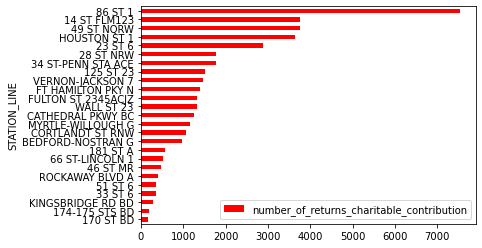

In [22]:
#Charitable Donations Bar Plot
top_25_with_charitable_donations.plot.barh(x = 'STATION_LINE', y='number_of_returns_charitable_contribution', rot=0, color = 'red')